In [1]:
from convokit import Corpus, download
import matplotlib.pyplot as plt

In [2]:
corpus = Corpus(download('subreddit-Cornell'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/subreddit-Cornell


In [5]:
convo_ids = set([c.id for c in corpus.iter_conversations()])
top_level_comments = [utt.id for utt in corpus.iter_utterances() if utt.reply_to in convo_ids]
corpus = corpus.reindex_conversations(top_level_comments, preserve_convo_meta=False)

In [9]:
convo_lens = [len(list(convo.iter_utterances())) for convo in corpus.iter_conversations()]

In [11]:
from collections import Counter

In [16]:
ctr = Counter(convo_lens)
xs = sorted(ctr)
ys = [ctr[x] for x in xs]

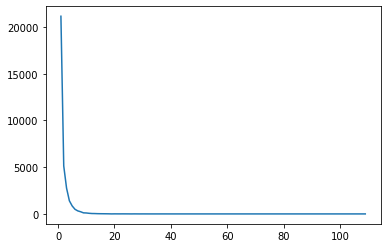

In [21]:
plt.plot(xs, ys)

In [23]:
above10 = sum([v for k, v in ctr.items() if k >=10])
above20 = sum([v for k, v in ctr.items() if k >=20])

In [26]:
above10 / len(list(corpus.iter_conversations()))

0.012405740695694478

In [27]:
above20 / len(list(corpus.iter_conversations()))

0.0017331549501337874